# Objetivo
Aplicar as seguintes transformadas de intensidade:

- [X] Logarítmica
- [ ] Exponencial
- [ ] Inversa

Implementar funções de histograma responsáveis por:
- [ ] Exibir
- [ ] Equalizar
- [ ] Comparar

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [12]:
image_path ="/content/olho-pb.jpg"

#### Classe de transformações

In [13]:
from ctypes import ArgumentError
"""
- Receives a image path and loads the image
- It has a function for each transformation
- when the class is instantiaded, only the original image is loaded
- for each funtion called it apply the transformation to the image and loads in - another attribute
"""
class Transformation:

  def __init__(self, image_path):
    self.original = cv.imread(image_path)

    if self.original is None:
      raise FileNotFoundError(f"Image in path {image_path} not found")

    self.log_image = None
    self.c = None
    self.exp_image = None
    self.exp_image_power = None
    self.inv_image = None

  """
  Apply a log transformation in the image
  params:
    c: Constant value that can be altered, if it is not provided, it will be calculated automatically
  """
  def log(self, c = None):
    # Converte a imagem para float para evitar problemas no cálculo logarítmico
    original_float = self.original.astype(np.float32)

    max_value_bit_value = 255

    if c is None:
      c = max_value_bit_value / np.log(1 + np.max(original_float))

    self.c = c
    log_image = c * ( np.log (original_float + 1) )

    if log_image is None:
      raise Exception("Log transformation failed")

    log_image = np.array(log_image, dtype = np.uint8)

    self.log_image = log_image


  """
  Apply the exponential tranformation to the power of the param: power
  param:
    power: power of the exponential transformation, default is 1.5
  """
  def exp(self, power = 1.5):
    exp_image = np.power(self.original, power)
    self.exp_image_power = power

    if exp_image is None:
      raise Exception("Exponential transformation failed")

    exp_image = np.clip(exp_image, 0, 255)
    exp_image = np.array(exp_image, dtype = np.uint8)

    self.exp_image = exp_image

  """
  Apply the inverse transformation to the image
  """
  def inv(self):
    max_value = 255

    inv_image = max_value - self.original
    inv_image = np.array(inv_image, dtype = np.uint8)

    if inv_image is None:
      raise Exception("Inverse transformation failed")

    self.inv_image = inv_image

  """
  Show images in a grid, comparing the original with the transformed images
  each row is the original image and one of the transformed image

  """
  def show_images(self):
    rows = 3
    cols = 2
    images = ["log", "exp", "inv"]

    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
    fig.patch.set_facecolor('silver')
    fig.suptitle('Original vs Transformed Images')

    fig.subplots_adjust(hspace=0.3, wspace=0.01)

    for row in range(0, rows):

      axes[row][0].imshow(self.original)
      axes[row][0].axis('off')  # Remove os eixos
      axes[row][1].axis('off')

      match images[row]:
        case "log":
          if self.log_image is None:
            raise Exception("Log transformation not applied")

          axes[row][1].imshow(self.log_image)
          axes[row][1].set_title(f"Logaritmic (c value {self.c})")

        case "exp":
          if self.exp_image is None:
            raise Exception("Exponential transformation not applied")

          axes[row][1].imshow(self.exp_image)
          axes[row][1].set_title(f"Exponential (Power {self.exp_image_power})")

        case "inv":
          if self.inv_image is None:
            raise Exception("Inverse transformation not applied")

          axes[row][1].imshow(self.inv_image)
          axes[row][1].set_title("Inverse")

    # Função para exibir apenas a imagem original
  def plot_original(self):
      plt.imshow(self.original)
      plt.title("Original Image")
      plt.axis('off')
      plt.show()

  # Função para exibir apenas a imagem logaritmica
  def plot_log(self):
      if self.log_image is None:
          raise Exception("Log transformation not applied")

      plt.imshow(self.log_image)
      plt.title(f"Logarithmic Transformation (c value {self.c})")
      plt.axis('off')
      plt.show()

  # Função para exibir apenas a imagem exponencial
  def plot_exp(self):
      if self.exp_image is None:
          raise Exception("Exponential transformation not applied")

      plt.imshow(self.exp_image)
      plt.title(f"Exponential Transformation (Power {self.exp_image_power})")
      plt.axis('off')
      plt.show()

  # Função para exibir apenas a imagem inversa
  def plot_inv(self):
      if self.inv_image is None:
          raise Exception("Inverse transformation not applied")

      plt.imshow(self.inv_image)
      plt.title("Inverse Transformation")
      plt.axis('off')
      plt.show()

  """
  Apply all transformations to the image in their default params
  """
  def transform(self):
    self.log()
    self.exp()
    self.inv()

### Execução das tranformações

In [14]:
transformations = Transformation(image_path)
transformations.transform()

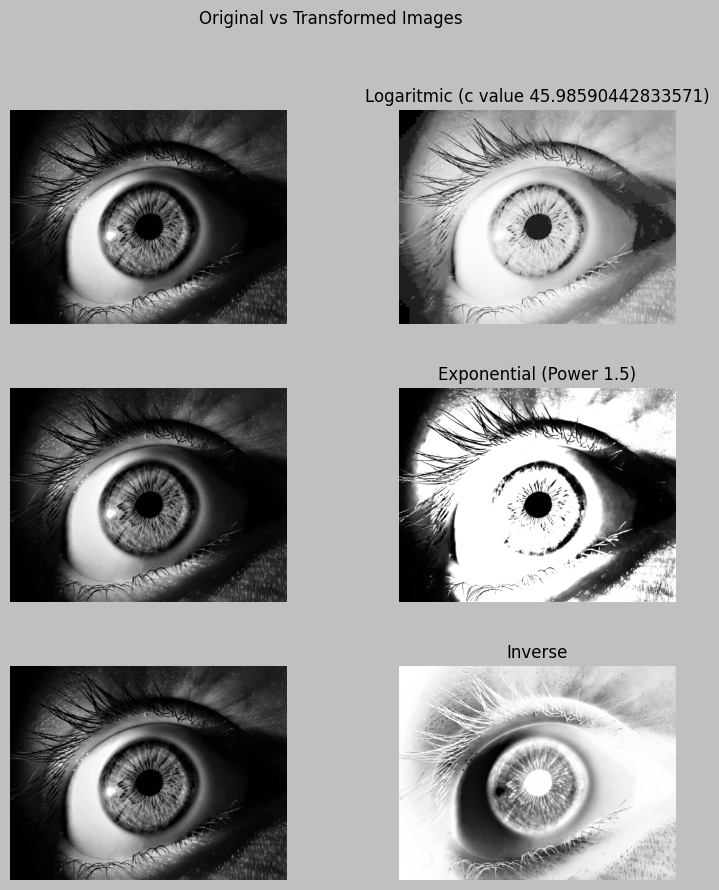

In [15]:
transformations.show_images()

### Classe de histogramas

In [29]:
class Histogram:

  def __init__(self, image_path):
    self.original = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    self.equalized = None
    self.original_histogram = None
    self.equalized_histogram = None

    if self.original is None:
      raise FileNotFoundError(f"Image in path {image_path} not found")

    self.equalize()

    self.calc_histograms()

  """
  Equalizes the image and loads it in the equalized attribute
  """
  def equalize(self):
    equalized = cv.equalizeHist(self.original)

    if equalized is None:
      raise Exception("Histogram equalization failed")

    equalized = np.array(equalized, dtype = np.uint8)

    self.equalized = equalized


  """
  Show images in a grid, comparing the original with the equalized image
  """
  def compare_images(self):

    if self.equalized is None:
      raise Exception("Histogram equalization not applied")

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    fig.patch.set_facecolor('silver')

    fig.suptitle('Original vs Equalized Image')
    fig.subplots_adjust(wspace=0.3)

    axs[0].imshow(self.original, cmap="gray")
    axs[0].set_title("Original Image")
    axs[0].axis('off')

    axs[1].imshow(self.equalized, cmap="gray")
    axs[1].set_title("Equalized Image")
    axs[1].axis('off')

    plt.show()

  """
  Draws the histogram of the images
  each row has a image with it's corresponding histogram
  """
  def compare_histograms_images(self):

    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    fig.patch.set_facecolor('silver')
    fig.suptitle('Original vs Equalized Image and Histograms')
    fig.tight_layout()
    fig.subplots_adjust(top=0.9, hspace=0.5, wspace=0.3)

    axs[0][0].imshow(self.original, cmap="gray")
    axs[0][0].set_title("Original Image")
    axs[0][0].axis('off')

    axs[0][1].plot(self.original_histogram)
    axs[0][1].set_title("Original Image Histogram")
    axs[0][1].set_xlabel("Pixel Value")
    axs[0][1].set_ylabel("Frequency")

    axs[1][0].imshow(self.equalized, cmap="gray")
    axs[1][0].set_title("Equalized Image")
    axs[1][0].axis('off')


    axs[1][1].plot(self.equalized_histogram)
    axs[1][1].set_title("Equalized Image Histogram")
    axs[1][1].set_xlabel("Pixel Value")
    axs[1][1].set_ylabel("Frequency")

    plt.show()

  """
  Draws the histogram of the images
  """
  def compare_histograms(self):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    fig.patch.set_facecolor('silver')
    fig.suptitle('Original vs Equalized Histograms\n\n')
    fig.subplots_adjust(wspace=0.3)

    axs[0].plot(self.original_histogram)
    axs[0].set_title("Original Image Histogram")
    axs[0].set_xlabel("Pixel Value")
    axs[0].set_ylabel("Frequency")

    axs[1].plot(self.equalized_histogram)
    axs[1].set_title("Equalized Image Histogram")
    axs[1].set_xlabel("Pixel Value")
    axs[1].set_ylabel("Frequency")

  def calc_histograms(self):
    histSize = [256]
    histRange = [0, 256]
    accumulate = False

    # Argumentos
    # canais: imagem cinza tem 1
    # índice: quais canais usar
    # mask: máscara que pode ser usada
    # histSize: tamanho do histograma em cada direção
    # histRange: intervalo de valores, não inclusivo a direito
    original_histogram = cv.calcHist([self.original], [0], None, histSize, histRange)

    if original_histogram is None:
      raise Exception("Histogram calculation failed")

    equalized_histogram = cv.calcHist([cv.Mat(self.equalized)], [0], None, histSize, histRange)

    if equalized_histogram is None:
      raise Exception("Histogram calculation failed")

    self.original_histogram = original_histogram
    self.equalized_histogram = equalized_histogram

### Execução dos histogramas

In [40]:
image_path2 = "/content/cavalo.jpg"
histograms = Histogram(image_path2)

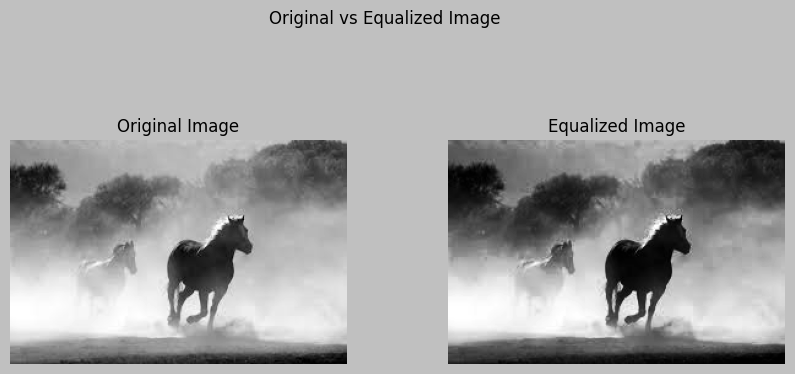

In [41]:
histograms.compare_images()

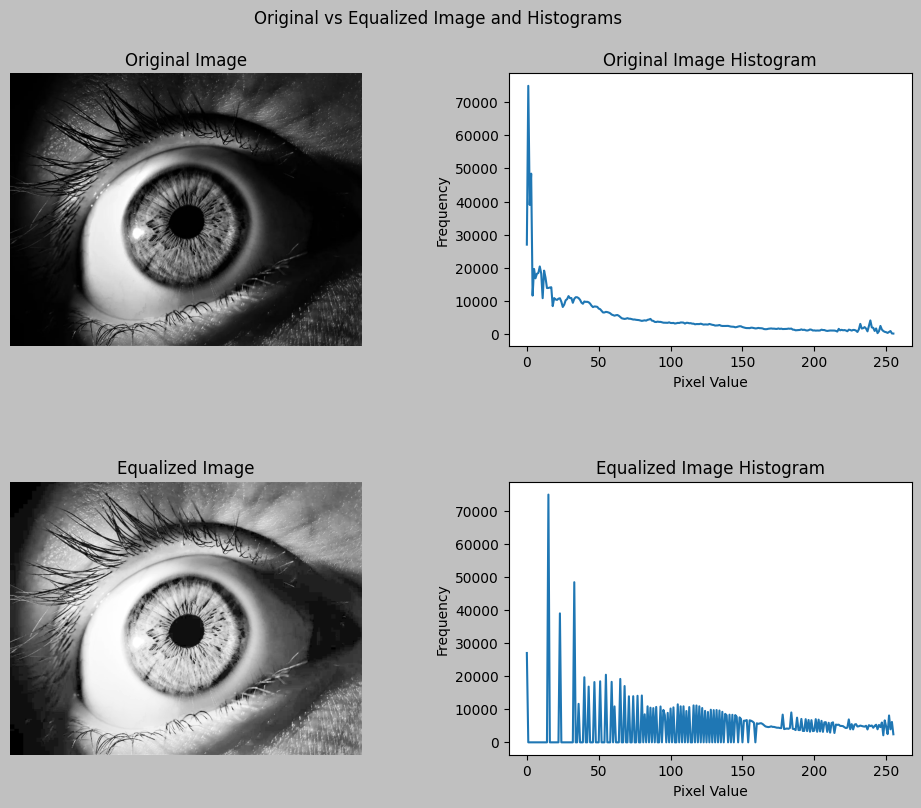

In [32]:
histograms.compare_histograms_images()

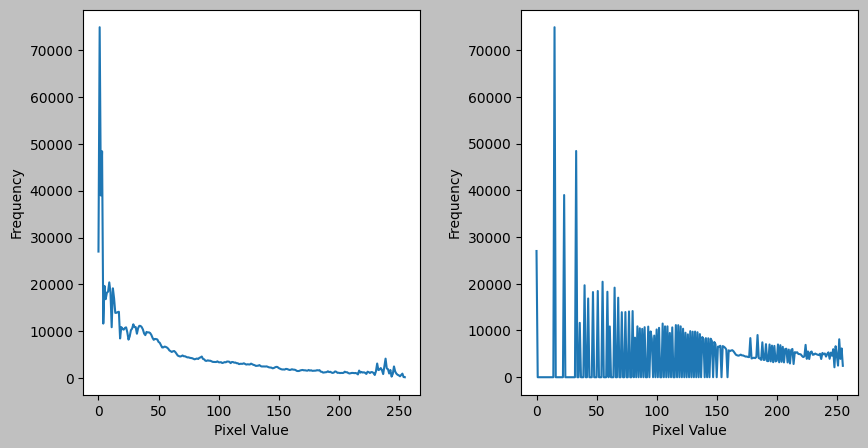

In [33]:
histograms.compare_histograms()

## Referências
https://ic.unicamp.br/~helio/disciplinas/MO443/aula_realce.pdf

https://www.geeksforgeeks.org/log-transformation-of-an-image-using-python-and-opencv/

https://docs.opencv.org/3.4/d8/dbc/tutorial_histogram_calculation.html



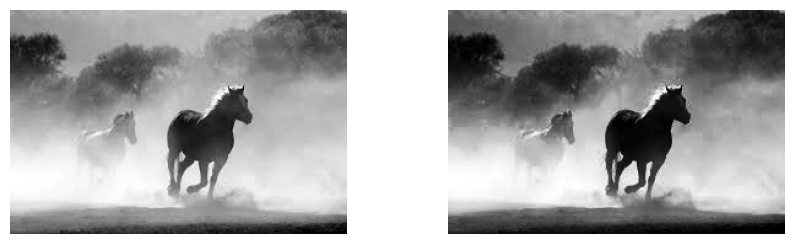

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.3)

axs[0].imshow(histograms.original, cmap="gray")
axs[0].axis('off')

axs[1].imshow(histograms.equalized, cmap="gray")
axs[1].axis('off')

plt.show()


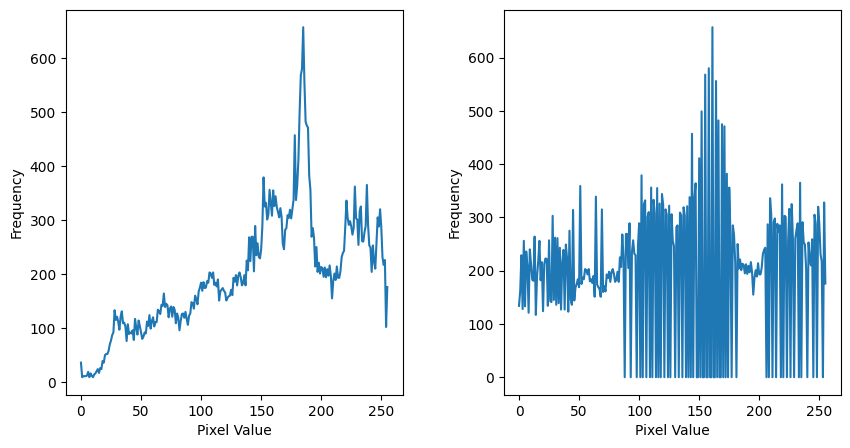

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.3)

axs[0].plot(histograms.original_histogram)
axs[0].set_xlabel("Pixel Value")
axs[0].set_ylabel("Frequency")

axs[1].plot(histograms.equalized_histogram)
axs[1].set_xlabel("Pixel Value")
axs[1].set_ylabel("Frequency")
plt.show()


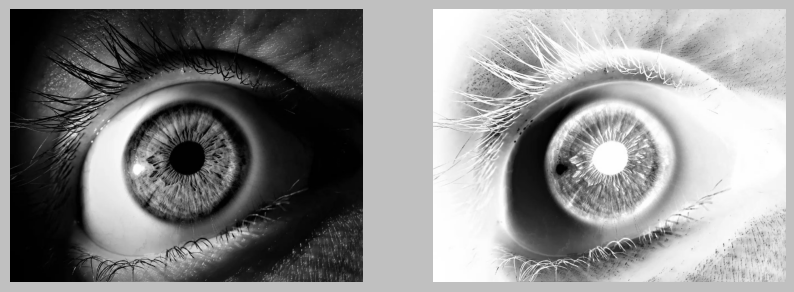

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.patch.set_facecolor('none')
fig.patch.set_facecolor('silver')

axs[0].imshow(transformations.original)
axs[0].axis('off')

transformations.exp(1.2)
axs[1].imshow(transformations.inv_image)
axs[1].axis('off')

plt.show()